### What movies make the most money at the box office? 


Соревнование https://www.kaggle.com/c/tmdb-box-office-prediction/overview

In [178]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import re
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ast
import seaborn
from datetime import datetime
from datetime import date

### About Dataset:
- id: Integer unique id of each movie
- belongs_to_collection: Contains the TMDB Id, Name, Movie Poster and Backdrop URL of a movie in JSON format.
- budget: Budget of a movie in dollars. Some row contains 0 values which mean unknown.
- genres: Contains all the Genres Name & TMDB Id in JSON Format.
- homepage: Contains the official URL of a movie.
- imdb_id: IMDB id of a movie (string).
- original_language: Two digit code of the original language, in which the movie was made.
- original_title: The original title of a movie in original_language.
- overview: Brief description of the movie.
- popularity: Popularity of the movie.
- poster_path: Poster path of a movie. 
- production_companies: All production company name and TMDB id in JSON format of a movie.
- production_countries: Two digit code and full name of the production company in JSON format.
- release_date: Release date of a movie in mm/dd/yy format.
- runtime: Total runtime of a movie in minutes (Integer).
- spoken_languages: Two digit code and full name of the spoken language.
- status: Is the movie released or rumored?
- tagline: Tagline of a movie
- title: English title of a movie
- Keywords: TMDB Id and name of all the keywords in JSON format.
- cast: All cast TMDB id, name, character name, gender (1 = Female, 2 = Male) in JSON format
- crew: Name, TMDB id, profile path of various kind of crew members job like Director, Writer, Art, Sound etc.
- revenue: Total revenue earned by a movie in dollars.

In [179]:
df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
print(df.shape, df_test.shape)
df.head()

(3000, 23) (4398, 22)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [181]:
def get_dict(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [182]:
for i, row in df.iterrows():
    languages = row['spoken_languages']
    languages_list = get_dict(languages)
    df.loc[i, 'lang_number'] = int(len(languages_list))
    
    s = []
    for language in languages_list:
        a = list(language.values())[0]
        s.append(a)
    df.loc[i, 'languages'] = str(s)

In [183]:
for i, row in df_test.iterrows():
    languages = row['spoken_languages']
    languages_list = get_dict(languages)
    df_test.loc[i, 'lang_number'] = int(len(languages_list))
    
    s = []
    for language in languages_list:
        a = list(language.values())[0]
        s.append(a)
    df_test.loc[i, 'languages'] = str(s)

In [184]:
df.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,lang_number,languages
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1.0,['en']
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1.0,['en']


In [185]:
for column in df[['cast', 'crew', 'genres', 'belongs_to_collection', 'Keywords']]:
    for i, row in df.iterrows():
        column_lists = row[column]
        lists = get_dict(column_lists)
        s = []
        for l in lists:
            a = list(l.values())[1]
            s.append(a)
        df.loc[i, column] = str(s)


In [186]:
for column in df[['production_companies', 'production_countries']]:
    for i, row in df.iterrows():
        column_lists = row[column]
        lists = get_dict(column_lists)
        s = []
        for l in lists:
            a = list(l.values())[0]
            s.append(a)
        df.loc[i, column] = str(s)

In [187]:
for column in df[['languages', 'cast', 'crew', 'production_companies', 'production_countries', 'Keywords', 'belongs_to_collection', 'genres']]:
    df[column] = df[column].apply(eval).apply(', '.join)

In [188]:
df.drop(columns=['spoken_languages', 'id', 'poster_path', 'original_title', 'imdb_id'], axis=1, inplace=True)

In [189]:
for column in df_test[['cast', 'crew', 'genres', 'belongs_to_collection', 'Keywords']]:
    for i, row in df_test.iterrows():
        column_lists = row[column]
        lists = get_dict(column_lists)
        s = []
        for l in lists:
            a = list(l.values())[1]
            s.append(a)
        df_test.loc[i, column] = str(s)

for column in df_test[['production_companies', 'production_countries']]:
    for i, row in df_test.iterrows():
        column_lists = row[column]
        lists = get_dict(column_lists)
        s = []
        for l in lists:
            a = list(l.values())[0]
            s.append(a)
        df_test.loc[i, column] = str(s)  

for column in df_test[['languages', 'cast', 'crew', 'production_companies', 'production_countries', 'Keywords', 'belongs_to_collection', 'genres']]:
    df_test[column] = df_test[column].apply(eval).apply(', '.join)
    
df_test.drop(columns=['spoken_languages', 'id', 'poster_path', 'original_title', 'imdb_id'], axis=1, inplace=True)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  3000 non-null   object 
 1   budget                 3000 non-null   int64  
 2   genres                 3000 non-null   object 
 3   homepage               946 non-null    object 
 4   original_language      3000 non-null   object 
 5   overview               2992 non-null   object 
 6   popularity             3000 non-null   float64
 7   production_companies   3000 non-null   object 
 8   production_countries   3000 non-null   object 
 9   release_date           3000 non-null   object 
 10  runtime                2998 non-null   float64
 11  status                 3000 non-null   object 
 12  tagline                2403 non-null   object 
 13  title                  3000 non-null   object 
 14  Keywords               3000 non-null   object 
 15  cast

In [191]:
df.release_date = pd.to_datetime(df.release_date)

In [192]:
df['weekday'] = df['release_date'].dt.weekday
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month

In [193]:
df['eng'] = df['languages'].apply(lambda x: 1 if 'en' in x else 0)

df['homepage'] = df['homepage'].fillna('no')
df.loc[df.homepage != 'no', 'homepage'] = 'yes'

df['tagline'] = df['tagline'].fillna(df['title'])

df['belongs_to_collection'] = df['belongs_to_collection'].fillna('no')

df['production_companies'] = df['production_companies'].fillna('unknown')
df['production_countries'] = df['production_countries'].fillna('unknown')
df['Keywords'] = df['Keywords'].fillna('unknown')
df['overview'] = df['overview'].fillna('unknown')
df['runtime'] = df['runtime'].fillna(df['runtime'].mean())

df.release_date = pd.to_datetime(df.release_date)
df['weekday'] = df['release_date'].dt.weekday
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month

In [196]:
df.describe()

,budget,popularity,runtime,revenue,lang_number,weekday,year,month,eng
count,3.000000e+03,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.253133e+07,8.463274,107.856571,6.672585e+07,1.452333,3.253333,2005.046333,6.775333,0.872667
std,3.702609e+07,12.104000,22.079069,1.375323e+08,0.887688,1.330568,15.919610,3.409115,0.333402
min,0.000000e+00,0.000001,0.000000,1.000000e+00,0.000000,0.000000,1971.000000,1.000000,0.000000
25%,0.000000e+00,4.018053,94.000000,2.379808e+06,1.000000,2.000000,1995.000000,4.000000,1.000000
50%,8.000000e+06,7.374861,104.000000,1.680707e+07,1.000000,4.000000,2006.000000,7.000000,1.000000
75%,2.900000e+07,10.890983,118.000000,6.891920e+07,2.000000,4.000000,2012.000000,10.000000,1.000000
max,3.800000e+08,294.337037,338.000000,1.519558e+09,9.000000,6.000000,2070.000000,12.000000,1.000000


In [ ]:
df = df.drop(columns=['release_date'])

In [197]:
df_test.release_date = pd.to_datetime(df_test.release_date)
df_test['weekday'] = df_test['release_date'].dt.weekday
df_test['year'] = df_test['release_date'].dt.year
df_test['month'] = df_test['release_date'].dt.month
df_test = df.drop(columns=['release_date'])

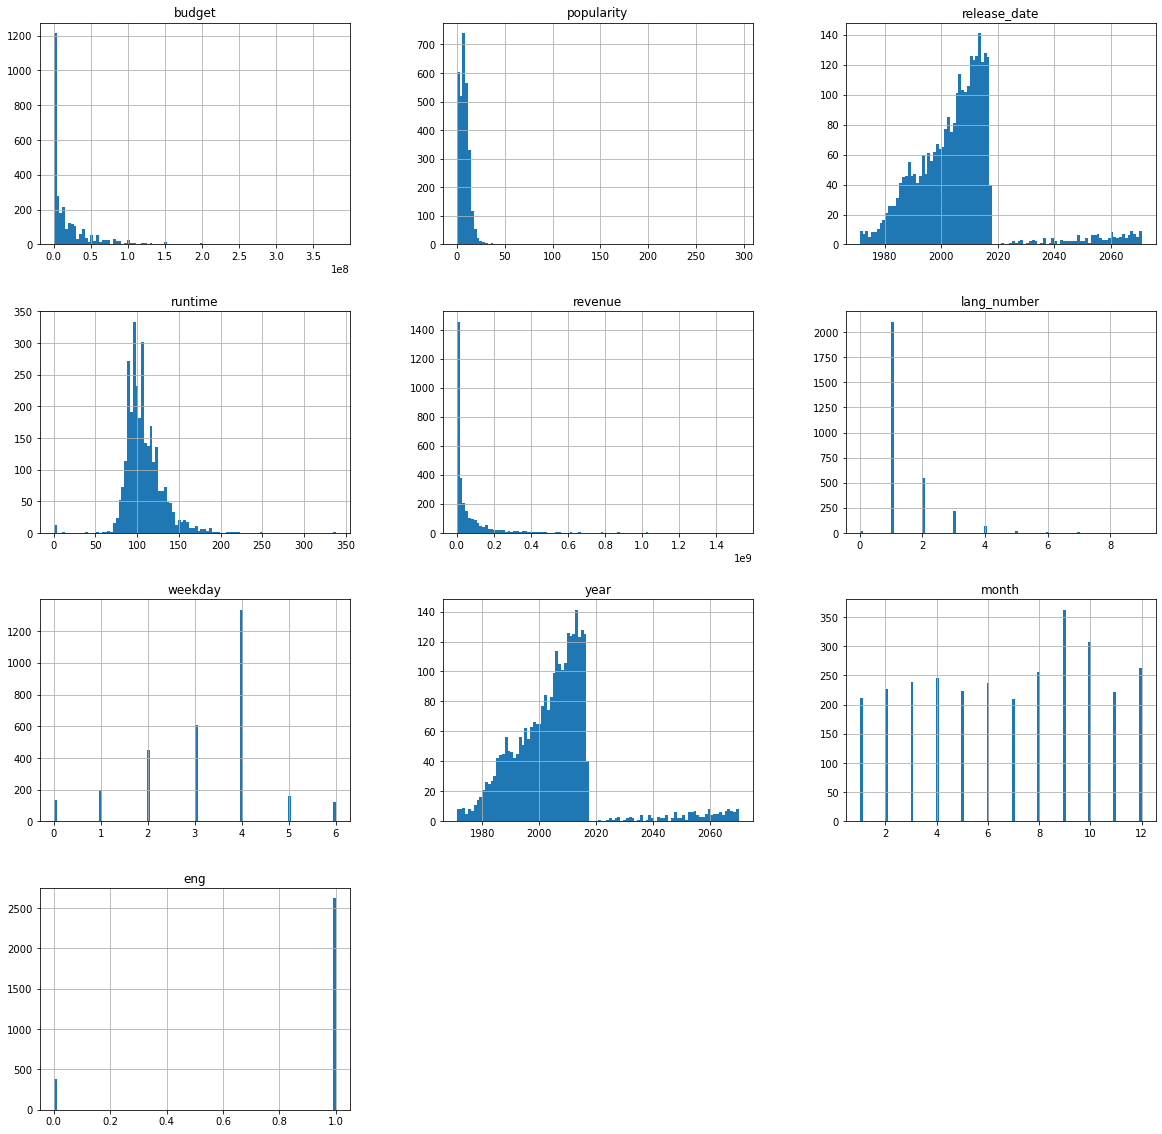

In [198]:
_ = df.hist(figsize=(20, 20), bins=100)

Видим, что признаки имеют разный масштаб, будем применять масштабирование.

In [199]:
df = df[df.year <= 2015]

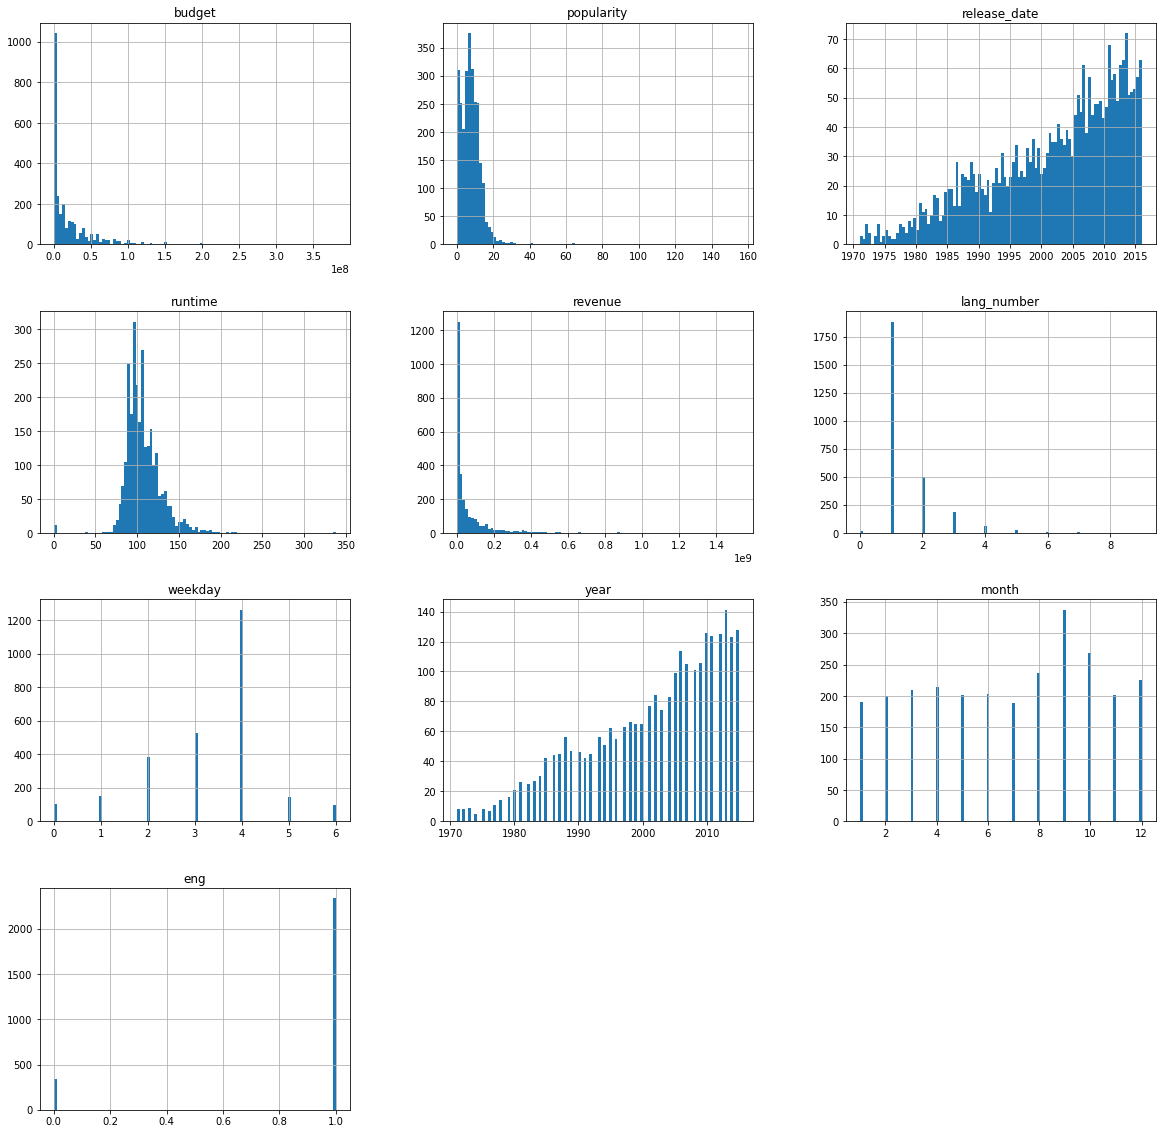

In [200]:
_ = df.hist(figsize=(20, 20), bins=100)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'budget'),
  Text(2, 0, 'popularity'),
  Text(3, 0, 'runtime'),
  Text(4, 0, 'revenue'),
  Text(5, 0, 'lang_number'),
  Text(6, 0, 'weekday'),
  Text(7, 0, 'year'),
  Text(8, 0, 'month'),
  Text(9, 0, 'eng')])

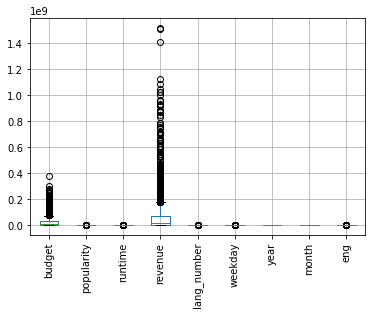

In [201]:
_ = df.boxplot()
plt.xticks(rotation=90)

In [202]:
bud = df.budget.values
q25, q75 = np.percentile(bud, 25), np.percentile(bud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 3
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off

outliers = [x for x in rev if x < v10_lower or x > v10_upper]
df = df.drop(df[(df['budget'] > v10_upper) | (df['budget'] < v10_lower)].index)

In [203]:
pop = df.popularity.values
q25, q75 = np.percentile(pop, 25), np.percentile(pop, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 3
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off

outliers = [x for x in rev if x < v10_lower or x > v10_upper]
df = df.drop(df[(df['popularity'] > v10_upper) | (df['popularity'] < v10_lower)].index)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'budget'),
  Text(2, 0, 'popularity'),
  Text(3, 0, 'runtime'),
  Text(4, 0, 'revenue'),
  Text(5, 0, 'lang_number'),
  Text(6, 0, 'weekday'),
  Text(7, 0, 'year'),
  Text(8, 0, 'month'),
  Text(9, 0, 'eng')])

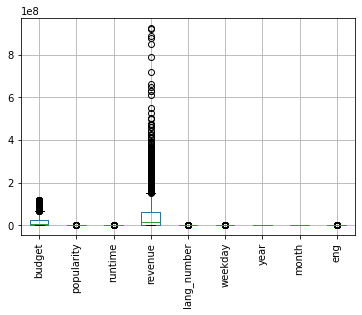

In [204]:
_ = df.boxplot()
plt.xticks(rotation=90)

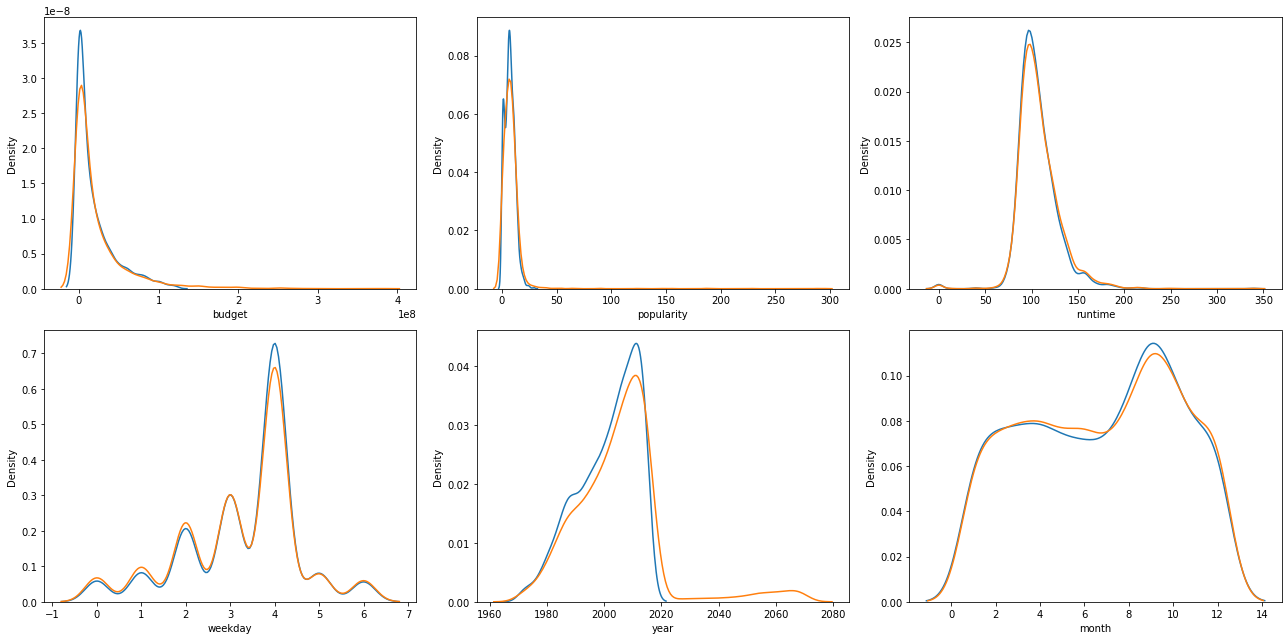

In [210]:
numeric = ['budget', 'popularity', 'runtime', 'weekday', 'year', 'month']
fig, axes = plt.subplots(2, 3, figsize=(18, 9))
i = 0
for feature in numeric:
    seaborn.kdeplot(df[feature], ax=axes[int(i / 3), int(i % 3)], label="Train")
    seaborn.kdeplot(df_test[feature], ax=axes[int(i / 3), int(i % 3)], label="Test")
    i += 1
fig.tight_layout()

In [12]:
df['Month'] = df['TweetAt'].dt.month
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Month
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,3
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,2,3
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,2,3
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,2,3
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",0,3


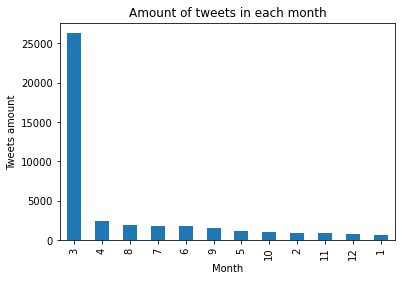

In [64]:
df['Month'].value_counts().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Tweets amount')
plt.title('Amount of tweets in each month')
plt.show()

In [13]:
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: re.sub(r'[#%!@*.,!:-]', '', x))
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: re.sub(r'http\S+', '', x))

df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Month
0,3799,48751,London,2020-03-16,MeNyrbie Phil_Gahan Chrisitv and and,1,3
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,2,3
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia Woolworths to give elder...,2,3
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,2,3
4,3803,48755,NaN,2020-03-16,Me ready to go at supermarket during the COVID...,0,3


In [14]:
df['TokenizedTweet'] = df['OriginalTweet'].apply(nltk.word_tokenize)
df['TokenizedTweet'] = df['TokenizedTweet'].apply(' '.join)

In [15]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text] 

In [16]:
lemmatizer = WordNetLemmatizer()
df['LemmatizedTweet'] = df['TokenizedTweet'].apply(lemmatizer.lemmatize)

In [12]:
#df = df.drop('OriginalTweet', axis = 1)

In [17]:
X = df['TokenizedTweet']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

In [14]:
vectorizer = CountVectorizer(stop_words='english', min_df=1)

#vectorizer.fit(X_train)

In [15]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_train_vec

<28809x48087 sparse matrix of type '<class 'numpy.int64'>'
	with 469827 stored elements in Compressed Sparse Row format>

In [16]:
model  = LogisticRegression()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      4628
           1       0.66      0.71      0.68      2252
           2       0.83      0.82      0.82      5468

    accuracy                           0.79     12348
   macro avg       0.76      0.77      0.77     12348
weighted avg       0.79      0.79      0.79     12348



In [17]:
for i, C in enumerate([0.0001, 0.01, 1, 100, 10000]):
    model  = LogisticRegression(C=C)
    model.fit(X_train_vec, y_train)
    print(model.score(X_test_vec, y_test))

0.49020084224165855
0.7126660187884678
0.7872529964366699
0.7620667314544866
0.7499190152251377


In [18]:
for i, penalty in enumerate(['l2', 'none']):
    model  = LogisticRegression(penalty=penalty, C = 1)
    model.fit(X_train_vec, y_train)
    print(model.score(X_test_vec, y_test))

0.7872529964366699
0.7479753806284418


In [19]:
for n in range(1,6):
    vectorizer = CountVectorizer(ngram_range=(n,n), stop_words='english')
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    model  = LogisticRegression(C=1, penalty = 'l2')
    model.fit(X_train_vec, y_train)
    print(model.score(X_test_vec, y_test))

0.7872529964366699
0.590702947845805
0.5234045999352122
0.49133462908973113
0.4824263038548753


При увеличении ngram_range результат ухудшался.

In [18]:
vectorizer = TfidfVectorizer(stop_words='english', min_df=1)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model  = LogisticRegression()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79      4628
           1       0.71      0.55      0.62      2252
           2       0.79      0.85      0.82      5468

    accuracy                           0.77     12348
   macro avg       0.76      0.73      0.74     12348
weighted avg       0.77      0.77      0.77     12348



In [21]:
for i, C in enumerate([0.0001, 0.01, 1, 100, 10000]):
    model  = LogisticRegression(C=C)
    model.fit(X_train_vec, y_train)
    print(model.score(X_test_vec, y_test))

0.4428247489471979
0.5585519922254616
0.7741334629089731
0.7692743764172335
0.7624716553287982


In [22]:
for i, penalty in enumerate(['l2', 'none']):
    model  = LogisticRegression(penalty=penalty, C = 1)
    model.fit(X_train_vec, y_train)
    print(model.score(X_test_vec, y_test))

0.7741334629089731
0.7588273404599936


In [23]:
for n in range(1,6):
    vectorizer = CountVectorizer(ngram_range=(n,n), stop_words='english')
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    model  = LogisticRegression(C=1, penalty = 'l2')
    model.fit(X_train_vec, y_train)
    print(model.score(X_test_vec, y_test))

0.7872529964366699
0.590702947845805
0.5234045999352122
0.49133462908973113
0.4824263038548753


In [24]:
parameters = {'n_estimators': [10, 20, 50, 70],
              'max_depth': [1, 2, 3, 4, 5, 6, 7]}

In [27]:
clf_forest = RandomForestClassifier()

clf_grid = GridSearchCV(estimator=clf_forest, param_grid=parameters, scoring='accuracy', cv=5)
clf_grid.fit(X_train_vec, y_train)
print('Лучший результат:', clf_grid.best_score_)
print('Лучшие параметры:', clf_grid.best_params_)

Лучший результат: 0.4371550650488831
Лучшие параметры: {'max_depth': 4, 'n_estimators': 10}


In [26]:
clf_forest = RandomForestClassifier(n_estimators = 10, max_depth = 4)
clf_grid.fit(X_train_vec, y_train)
y_pred = clf_grid.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      4628
           1       0.00      0.00      0.00      2252
           2       0.44      1.00      0.61      5468

    accuracy                           0.44     12348
   macro avg       0.48      0.33      0.21     12348
weighted avg       0.57      0.44      0.27     12348



In [31]:
parameters = {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01],
              'penalty': ['l2', 'l1', 'elasticnet']}
SGD = SGDClassifier()

SGD_grid = GridSearchCV(estimator=SGD, param_grid=parameters, scoring='accuracy', cv=5)
SGD_grid.fit(X_train_vec, y_train)
print('Лучший результат:', SGD_grid.best_score_)
print('Лучшие параметры:', SGD_grid.best_params_)

Лучший результат: 0.4784963477201094
Лучшие параметры: {'alpha': 0.0001, 'penalty': 'l2'}


In [32]:
SGD = SGDClassifier(alpha = 0.0001, penalty = 'l2')
SGD_grid.fit(X_train_vec, y_train)
y_pred = SGD_grid.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.10      0.18      4628
           1       0.68      0.07      0.13      2252
           2       0.46      0.98      0.63      5468

    accuracy                           0.48     12348
   macro avg       0.65      0.38      0.31     12348
weighted avg       0.63      0.48      0.37     12348



In [2]:
import xgboost as xgb
from xgboost import XGBClassifier

In [21]:
parameters = {'n_estimators': [10, 30, 60],
              'max_depth': [1, 3, 5, 6],
               'learning_rate': [0.005, 0.01, 0.03]}
XGB = XGBClassifier()

XGB_grid = GridSearchCV(estimator=XGB, param_grid=parameters, scoring='accuracy', cv=5)
XGB_grid.fit(X_train_vec, y_train)
print('Лучший результат:', XGB_grid.best_score_)
print('Лучшие параметры:', XGB_grid.best_params_)

Лучший результат: 0.5823179910686231
Лучшие параметры: {'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 60}


In [22]:
XGB = XGBClassifier(learning_rate=0.03, max_depth=6, n_estimators=60)
XGB.fit(X_train_vec, y_train)
y_pred = XGB.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.50      0.58      4628
           1       0.48      0.31      0.37      2252
           2       0.57      0.79      0.67      5468

    accuracy                           0.59     12348
   macro avg       0.58      0.53      0.54     12348
weighted avg       0.60      0.59      0.58     12348



In [19]:
# модель с дефолтными параметрами
XGB = XGBClassifier()
XGB.fit(X_train_vec, y_train)
y_pred = XGB.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.58      0.65      4628
           1       0.55      0.32      0.40      2252
           2       0.61      0.82      0.70      5468

    accuracy                           0.64     12348
   macro avg       0.63      0.57      0.58     12348
weighted avg       0.64      0.64      0.63     12348

